In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
udprs_cog_moc=pd.read_csv('../Clinical Data/Processed/udprs_cog_moc.csv')

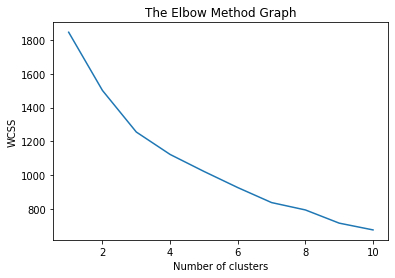

In [91]:
clustervars=['tremor_coef','non_tremor_coef',
 'SectionIIITotal_coef','MMSEresult_coef','MoCATotal_coef','Age_Diagnosis','tremor','non_tremor',
             'Section III Total','MMSE result','MoCA Total']

def z_score(df,var):
    x = (df[var] - df[var].mean())/df[var].std(ddof=0)
    return  x

def z_score(col):
    x = (col - col.mean())/col.std(ddof=0)
    return  x

mask_tp=(udprs_cog_moc['time_point']==0)
df=udprs_cog_moc[clustervars][mask_tp]

df1=df.copy()
for var in clustervars:
    df1[var]=z_score(df1[var])

def replacenullsmean(df):
    for col in df.columns:
        nullmask=(df[col].isna())
        df[col][nullmask]=df[col][~nullmask].mean()
    return df

df1=replacenullsmean(df1)

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0)
     kmeans.fit(df1)
     wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=4, random_state=0).fit(df1)
df['cluster_label']=kmeans.labels_.tolist()
df.to_csv('../Clinical Data/Processed/clusters.csv')

,tremor_coef,non_tremor_coef,SectionIIITotal_coef,MMSEresult_coef,MoCATotal_coef,Age_Diagnosis,tremor,non_tremor,Section III Total,MMSE result,MoCA Total
0,-0.112078,-0.060407,-1.071010,-0.213837,-0.910138,59.764545,1.0,2.1,38.0,24.0,25.0
4,0.000000,0.511204,4.089636,-6.134454,-2.044818,64.172485,0.2,1.9,38.0,30.0,25.0
6,NaN,0.094324,2.556999,0.246589,0.414412,55.186858,0.0,1.1,15.0,29.0,28.0
11,-0.017039,0.001415,0.981759,0.077668,0.003073,64.164271,1.6,0.9,22.0,29.0,29.0
18,0.169669,0.190877,5.726322,0.212086,-0.848344,64.796715,0.4,0.8,18.0,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...
395,0.393531,-0.787062,-9.838275,0.000000,0.983827,68.711841,0.2,2.3,42.0,29.0,23.0
397,0.000000,0.000000,0.000000,0.000000,0.000000,70.644764,0.8,0.9,24.0,25.0,24.0
398,0.000000,0.000000,0.000000,0.000000,0.000000,69.878166,0.6,1.3,26.0,26.0,24.0
399,0.000000,0.000000,0.000000,0.000000,0.000000,76.673511,0.8,2.1,40.0,30.0,28.0


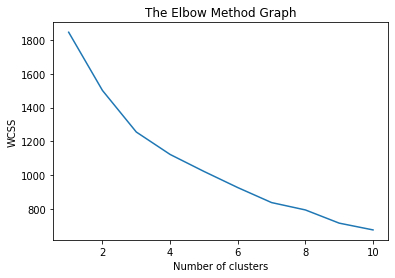

In [82]:
from sklearn.cluster import KMeans

#kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_


array([[-6.26830136e-03,  5.80157289e-01,  6.48207441e-01,
        -1.49675480e-01,  1.10784936e+00, -5.54428502e-03,
        -8.75730429e-01,  5.90405167e-01,  6.29399636e-01,
        -1.55331199e+00, -2.24103086e+00,  2.00000000e+00],
       [-1.52891901e-01, -1.20557710e-01, -2.33929581e-01,
        -3.92005001e-02, -1.89006400e-02, -5.86830952e-03,
         4.34852618e-01,  7.22023563e-01,  7.85188275e-01,
         1.03013850e-01,  1.72775538e-01,  1.11022302e-15],
       [-1.35813196e-02, -1.01517542e+01, -7.16196136e+00,
         1.22529971e+01, -1.87762097e+00,  1.27075992e+00,
         1.21542657e-01,  6.93847768e-01,  1.23738303e-01,
        -5.64820259e+00,  2.32198338e-01,  1.00000000e+00],
       [ 1.42740270e-01,  1.43846144e-01,  2.00987447e-01,
        -9.09528189e-02, -1.37121886e-01, -9.36495060e-03,
        -2.63592512e-01, -7.71862743e-01, -8.29568570e-01,
         2.23644688e-01,  1.96827624e-01,  2.00000000e+00]])

In [83]:
df['cluster_label'].value_counts()

3    81
1    75
0    13
2     1
Name: cluster_label, dtype: int64

In [33]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 484 samples in 0.002s...
[t-SNE] Computed neighbors for 484 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 484 / 484
[t-SNE] Mean sigma: 0.118004
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.796249
[t-SNE] KL divergence after 300 iterations: 0.201139


In [38]:
tsne_results[:,1]

array([ 8.03402710e+00, -1.76381266e+00, -1.48521414e+01, -7.65456676e+00,
       -9.19655704e+00, -7.80295610e-01, -3.45208144e+00, -3.60406947e+00,
       -1.25347824e+01,  1.13585758e+00,  7.59630859e-01,  1.00276756e+01,
       -1.37036123e+01, -1.47048378e+01, -2.48448610e+00,  1.24781656e+01,
        9.80412674e+00,  1.24654989e+01, -4.06769514e+00, -1.22979379e+00,
        2.87372637e+00,  1.44017124e+01,  1.32835741e+01,  7.71169615e+00,
       -1.69873846e+00,  1.36726532e+01,  9.22429502e-01, -1.17759457e+01,
        1.29802589e+01, -1.37066689e+01, -6.93914592e-01, -2.11173654e+00,
       -1.61088486e+01, -2.36546922e+00, -2.79764295e+00, -2.99665904e+00,
        1.21648817e+01,  5.89339316e-01, -2.38918495e+00, -3.41648078e+00,
        6.46625805e+00,  1.45490522e+01,  1.23786917e+01,  1.19785357e+01,
       -1.56425982e+01, -2.02251121e-01, -1.55432358e+01,  1.38951807e+01,
       -4.44471741e+00, -7.30486488e+00,  6.99134111e-01,  1.37994003e+01,
        1.99383557e+00,  

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


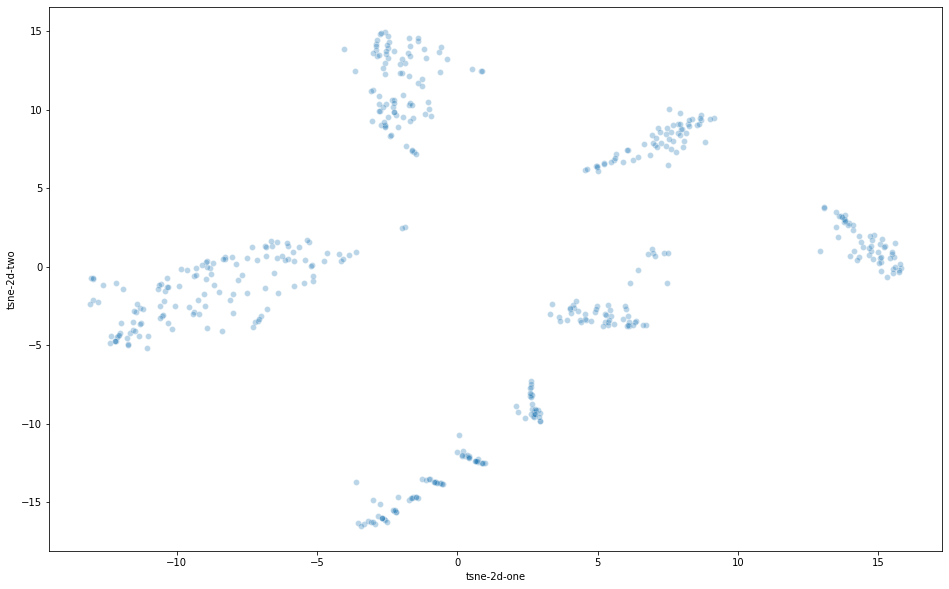

In [39]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(tsne_results)
kmeans.labels_

#kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_



array([[ 10.076483  ,  -0.54029393],
       [ -8.810883  ,  -1.4425225 ],
       [ -2.0319777 ,  11.631211  ],
       [  0.03993505, -12.444719  ],
       [  7.1562123 ,   8.013867  ]], dtype=float32)

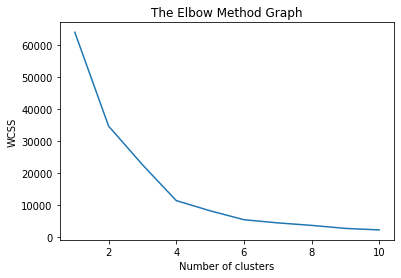

In [44]:
#3 Using the elbow method to find out the optimal number of #clusters. 
#KMeans class from the sklearn library.
from sklearn.cluster import KMeans
wcss=[]
#this loop will fit the k-means algorithm to our data and 
#second we will compute the within cluster sum of squares and #appended to our wcss list.
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
#i above is between 1-10 numbers. init parameter is the random #initialization method  
#we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
#find the final clusters when the K-meands algorithm is running. we #enter the default value of 300
#the next parameter is n_init which is the number of times the #K_means algorithm will be run with
#different initial centroid.
     kmeans.fit(df)
    #kmeans algorithm fits to the X dataset
     wcss.append(kmeans.inertia_)
#kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
#4.Plot the elbow graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  called y K-means
y_kmeans = kmeans.fit_predict(df)

In [53]:
df['cluster']=y_kmeans

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
df

,MoCA Total,UDPRS_Tot,Progression,tremor,non_tremor,tsne-2d-one,tsne-2d-two,cluster
0,-0.075254,-0.106577,-0.045433,-0.210976,-0.096106,7.697864,8.034027,0
1,-0.097820,-0.069554,-0.103779,-0.956323,-0.052003,-7.993207,-1.763813,1
2,-0.052687,0.179027,-0.072431,2.025065,0.006801,-1.737241,-14.852141,2
3,-0.188087,0.200183,-0.080186,0.907044,-0.022601,2.619126,-7.654567,2
4,-0.007553,-0.064265,-0.079167,0.907044,-0.052003,2.715523,-9.196557,2
...,...,...,...,...,...,...,...,...
479,0.037580,-0.080132,-0.100208,-0.956323,-0.088756,-10.354376,-0.688637,1
480,0.015013,-0.244090,-0.127882,-0.956323,-0.103457,-12.073792,-4.359869,1
481,-0.052687,0.448764,-0.083036,2.770412,0.095007,-2.511412,-16.247200,2
482,0.037580,-0.127733,-0.096151,2.025065,-0.074055,-1.455832,-14.700660,2


In [46]:
 
df['tsne-2d-two'] = tsne_results[:,1]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  called y K-means
#y_kmeans = kmeans.fit_predict(X)

y_kmeans = kmeans.fit_predict(tsne_results)

In [65]:
X=np.asarray(df)

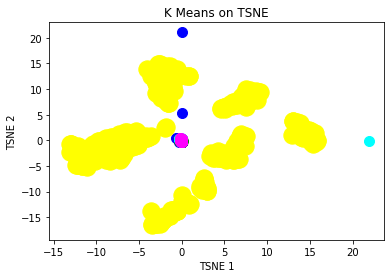

In [67]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(tsne_results[:,0], tsne_results[:,1], s=300, c='yellow', label = 'Centroids')
plt.title('K Means on TSNE')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.show()